In [1]:
#import libraries
from bs4 import BeautifulSoup
import requests
import re 
import pandas as pd
import numpy as np
from time import sleep
from datetime import datetime, timedelta
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import sys

import re

## Create Scraping Procedure

In [2]:
url = "https://www.lakiotis.gr/plakakia/choros/esoterikoi-exoterikoi-choroi"
headers={'User-Agent': ''}
page = requests.get(url,timeout=15, headers= headers)
print(page)

<Response [200]>


In [3]:
soup = BeautifulSoup(page.content, "html.parser")

In [4]:
row = soup.find("ol", {"class":"products list items product-items"}).find_all('li')
row

[<li class="col-xs-12 col-sm-12 col-md-6 col-lg-4"> <div class="item gtag-21753">
 <div class="product-item-info-custom" data-container="product-grid">
 <div class="product-image">
 <a class="product photo product-item-photo" href="https://www.lakiotis.gr/plakakia/choros/esoterikoi-exoterikoi-choroi/nioytral-0005500-mat-10-10-gran-prot-poi" tabindex="-1">
 <span class="product-image-container product-image-container-21753">
 <span class="product-image-wrapper">
 <img alt="ΝΙΟΥΤΡΑΛ 0005500 ΜΑΤ 10x10cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟΥ ΓΡΑΝΙΤΗΣ ΠΡΩΤΗΣ ΠΟΙΟΤΗΤΑΣ" class="product-image-photo" loading="lazy" max-height="500" max-width="500" src="https://www.lakiotis.gr/media/catalog/product/cache/afdc6571ceafd28b96e63dd8d9f566ce/0/1/0110100103_1.jpg"/></span>
 </span>
 <style>.product-image-container-21753 {
     width: 500px;
 }
 .product-image-container-21753 span.product-image-wrapper {
     padding-bottom: 100%;
 }</style> </a>
 </div>
 <div class="sku-line">
 <span>Κωδ.0110100103</span>
 </div>
 <div cla

In [5]:
#product id
product_id = row[1].find("div", {"class": "sku-line"}).find_all('span')[0].get_text().strip().split('.')[1]
product_id

'0110100109'

In [6]:
#product title
product_title = row[1].find("div", {"class": "product-name"}).find_all('a')[0].get_text().strip()
product_title

'ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΝΙΟΥΤΡΑΛ 0004000 10x10cm ΜΑΤ R10 ΠΡΩΤΗΣ ΠΟΙΟΤΗΤΑΣ'

In [7]:
#product price
product_price = row[1].find("div", {"class": "product-price"}).find('span', {"class": "price"}).get_text()
product_price

'26,00\xa0€'

In [8]:
#page number
page_number = soup.find('li', {"class" : "item current"}).find_all('span')[1].get_text()
page_number

'1'

In [9]:
#this category contains 792 products , 20 products per page
792/20

39.6

In [10]:
#40 pages 
pages = 40

In [11]:
df = pd.DataFrame([{
    "product_id": product_id,
    "product_title": product_title,
    "product_price": product_price
   
}])

df

,product_id,product_title,product_price
0,0110100109,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΝΙΟΥΤΡΑΛ 0004000 10x10cm ΜΑΤ ...,"26,00 €"


## Scraping

In [12]:
# df = pd.DataFrame()
df = pd.DataFrame()

def scrape(page):
    urlpattern = "https://www.lakiotis.gr/plakakia/choros/esoterikoi-exoterikoi-choroi?p={}"
    url = urlpattern.format(page)
    headers={'User-Agent': ''}
    response = requests.get(url,timeout=15, headers=headers)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        row = soup.find("div", {"class": "products wrapper grid products-grid"}).find_all('li')
        lst = []
        for r in row[1:]:
            #product_id
            try:
                product_id = r.find("div", {"class": "sku-line"}).find_all('span')[0].get_text().strip().split('.')[1]
            except:
                product_id = np.nan 
            #product title
            try:
                product_title = r.find("div", {"class": "product-name"}).find_all('a')[0].get_text().strip()
            except:
                product_title = np.nan
                #product price
            try:
                product_price = r.find("div", {"class": "product-price"}).find('span', {"class": "price"}).get_text()
            except:
                product_price = np.nan
         
        
            
            
            temp = {
                "product_id": product_id,
                "product_title": product_title,
                "product_price": product_price
            }
            lst.append(temp)
            
#   df = df.append(temp, ignore_index=True)
                
    else:
        print('Scraper is down!')
            
    return pd.DataFrame(lst)

In [13]:

df = scrape(page)
df

,product_id,product_title,product_price
0,0110100109,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΝΙΟΥΤΡΑΛ 0004000 10x10cm ΜΑΤ ...,"26,00 €"
1,0113250002,ΠΙΕΤΡΕ ΝΤΙΦΙΟΥΜΕ ΤΑΒΕΛΑ MAT 13x25cm ΠΛΑΚΑΚΙ ΤΟ...,"20,00 €"
2,0208450005,"ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΓΚΡΙΝΓΟΥΝΤ ΝΟΤΣΕ R10 7,5x45cm...","50,00 €"
3,0208450006,"ΓΚΡΙΝΓΟΥΝΤ ΜΠΡΟΥΝΟ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"
4,0208450007,"ΓΚΡΙΝΓΟΥΝΤ ΓΚΡΕΙΤΖ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"
5,0210010001,"ΤΙΤΑΝ ΓΚΡΙΣ 5,6 mm MAT 100x100cm ΠΛΑΚΑΚΙ ΔΑΠΕΔ...","31,00 €"
6,0210010002,"ΠΛΑΚΑΚΙ ΔΑΠΕΔΟΥ ΤΕΜΠΟ ΓΚΡΙΣ 3,5 mm R10 100x100...","55,00 €"
7,0210030004,"ΚΑΛΑΚΑΤΑ ΜΑΤ SLIM 5,5mm 100x300cm ΠΛΑΚΑΚΙ ΓΡ...","97,00 €"
8,0210030011,"ΕΣΤΑΤΟΥΑΡΙΟ ΜΑΤ 5,6MM SLIM 100x300cm ΠΛΑΚΑΚΙ ...","100,00 €"
9,0210100003,ΜΕΤΑΛΓΚΛΟΣ ΟΣΕΑΝ ΜΠΛΟΥ ΜΑΤ 10x10cm ΠΛΑΚΑΚΙ ΔΑΠ...,"9,90 €"


In [14]:
#use scrape function for 40 pages
for i in range(1,41):
    temp_df = scrape(i)
    df = pd.concat([df, temp_df])

In [15]:
df.head()

,product_id,product_title,product_price
0,0110100109,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΝΙΟΥΤΡΑΛ 0004000 10x10cm ΜΑΤ ...,"26,00 €"
1,0113250002,ΠΙΕΤΡΕ ΝΤΙΦΙΟΥΜΕ ΤΑΒΕΛΑ MAT 13x25cm ΠΛΑΚΑΚΙ ΤΟ...,"20,00 €"
2,0208450005,"ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΓΚΡΙΝΓΟΥΝΤ ΝΟΤΣΕ R10 7,5x45cm...","50,00 €"
3,0208450006,"ΓΚΡΙΝΓΟΥΝΤ ΜΠΡΟΥΝΟ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"
4,0208450007,"ΓΚΡΙΝΓΟΥΝΤ ΓΚΡΕΙΤΖ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"


In [16]:
df.shape

(771, 3)

In [17]:
df[df.duplicated(subset='product_id')]

,product_id,product_title,product_price
0,0110100109,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΝΙΟΥΤΡΑΛ 0004000 10x10cm ΜΑΤ ...,"26,00 €"
1,0113250002,ΠΙΕΤΡΕ ΝΤΙΦΙΟΥΜΕ ΤΑΒΕΛΑ MAT 13x25cm ΠΛΑΚΑΚΙ ΤΟ...,"20,00 €"
2,0208450005,"ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΓΚΡΙΝΓΟΥΝΤ ΝΟΤΣΕ R10 7,5x45cm...","50,00 €"
3,0208450006,"ΓΚΡΙΝΓΟΥΝΤ ΜΠΡΟΥΝΟ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"
4,0208450007,"ΓΚΡΙΝΓΟΥΝΤ ΓΚΡΕΙΤΖ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"
5,0210010001,"ΤΙΤΑΝ ΓΚΡΙΣ 5,6 mm MAT 100x100cm ΠΛΑΚΑΚΙ ΔΑΠΕΔ...","31,00 €"
6,0210010002,"ΠΛΑΚΑΚΙ ΔΑΠΕΔΟΥ ΤΕΜΠΟ ΓΚΡΙΣ 3,5 mm R10 100x100...","55,00 €"
7,0210030004,"ΚΑΛΑΚΑΤΑ ΜΑΤ SLIM 5,5mm 100x300cm ΠΛΑΚΑΚΙ ΓΡ...","97,00 €"
8,0210030011,"ΕΣΤΑΤΟΥΑΡΙΟ ΜΑΤ 5,6MM SLIM 100x300cm ΠΛΑΚΑΚΙ ...","100,00 €"
9,0210100003,ΜΕΤΑΛΓΚΛΟΣ ΟΣΕΑΝ ΜΠΛΟΥ ΜΑΤ 10x10cm ΠΛΑΚΑΚΙ ΔΑΠ...,"9,90 €"


In [91]:
#we must drop duplicates 
df_dapedou = df.drop_duplicates(subset='product_id')
df_dapedou.shape

(752, 3)

In [92]:
df_dapedou = df_dapedou.set_index('product_id')
df_dapedou

,product_title,product_price
product_id,,
0110100109,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΝΙΟΥΤΡΑΛ 0004000 10x10cm ΜΑΤ ...,"26,00 €"
0113250002,ΠΙΕΤΡΕ ΝΤΙΦΙΟΥΜΕ ΤΑΒΕΛΑ MAT 13x25cm ΠΛΑΚΑΚΙ ΤΟ...,"20,00 €"
0208450005,"ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΓΚΡΙΝΓΟΥΝΤ ΝΟΤΣΕ R10 7,5x45cm...","50,00 €"
0208450006,"ΓΚΡΙΝΓΟΥΝΤ ΜΠΡΟΥΝΟ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"
0208450007,"ΓΚΡΙΝΓΟΥΝΤ ΓΚΡΕΙΤΖ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €"
...,...,...
0210030016,"ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΛΑΒΑ ΚΟΡΤΕΝ 5,6mm SLIM R10 10...","132,00 €"
0216032061,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΤΡΑΒΕΡΤΙΝΟ ΓΚΡΕΙ ΜΑΤ 6mm 160x...,"100,00 €"
0216032062,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΑΤΛΑΝΤΙΣ ΓΚΡΕΙ Β ΜΑΤ 6mm 160x...,"100,00 €"


In [93]:
df_dapedou['diastasi'] = df_dapedou['product_title'].str.extract(r'(\d+\S+x+\S+).*(?=[c])')
df_dapedou.head(10)

,product_title,product_price,diastasi
product_id,,,
0110100109,ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΝΙΟΥΤΡΑΛ 0004000 10x10cm ΜΑΤ ...,"26,00 €",10x10
0113250002,ΠΙΕΤΡΕ ΝΤΙΦΙΟΥΜΕ ΤΑΒΕΛΑ MAT 13x25cm ΠΛΑΚΑΚΙ ΤΟ...,"20,00 €",13x25
0208450005,"ΠΛΑΚΑΚΙ ΓΡΑΝΙΤΗΣ ΓΚΡΙΝΓΟΥΝΤ ΝΟΤΣΕ R10 7,5x45cm...","50,00 €","7,5x45"
0208450006,"ΓΚΡΙΝΓΟΥΝΤ ΜΠΡΟΥΝΟ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €","7,5x45"
0208450007,"ΓΚΡΙΝΓΟΥΝΤ ΓΚΡΕΙΤΖ R10 7,5x45cm ΠΛΑΚΑΚΙ ΔΑΠΕΔΟ...","50,00 €","7,5x45"
0210010001,"ΤΙΤΑΝ ΓΚΡΙΣ 5,6 mm MAT 100x100cm ΠΛΑΚΑΚΙ ΔΑΠΕΔ...","31,00 €",100x100
0210010002,"ΠΛΑΚΑΚΙ ΔΑΠΕΔΟΥ ΤΕΜΠΟ ΓΚΡΙΣ 3,5 mm R10 100x100...","55,00 €",100x100
0210030004,"ΚΑΛΑΚΑΤΑ ΜΑΤ SLIM 5,5mm 100x300cm ΠΛΑΚΑΚΙ ΓΡ...","97,00 €",100x300
0210030011,"ΕΣΤΑΤΟΥΑΡΙΟ ΜΑΤ 5,6MM SLIM 100x300cm ΠΛΑΚΑΚΙ ...","100,00 €",100x300


In [94]:
df_dapedou.info()

<class 'pandas.core.frame.DataFrame'>
Index: 752 entries, 0110100109 to 0216232448
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_title  752 non-null    object
 1   product_price  752 non-null    object
 2   diastasi       737 non-null    object
dtypes: object(3)
memory usage: 23.5+ KB


In [103]:
df_dapedou['product_price'] = df_dapedou['product_price'].replace('\,','.', regex=True)
df_dapedou['product_price'] = df_dapedou['product_price'].str.extract(r'([^\s]+)')

In [106]:
df_dapedou['product_price'] = pd.to_numeric(df_dapedou['product_price'])

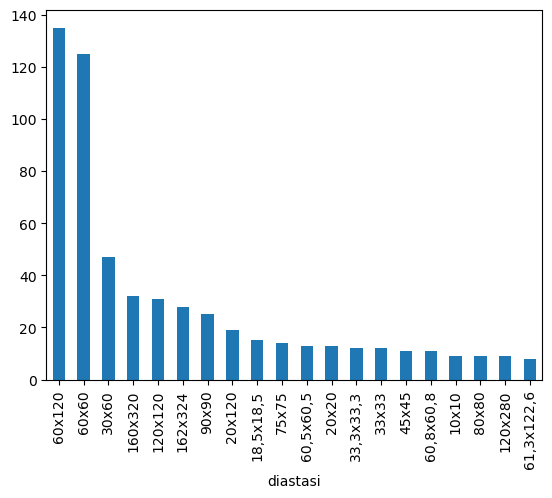

In [107]:
df_dapedou.groupby('diastasi').count()['product_title'].sort_values(ascending=False)[:20].plot.bar()

In [145]:
#mode price per dimension
price_per_dimension = df_dapedou.groupby('diastasi')['product_price'].agg(pd.Series.mode)

In [146]:
price_per_dimension = pd.DataFrame(price_per_dimension)    

In [148]:
for val in price_per_dimension['product_price']:
    if type(val) is list:
        print(val)